# TMDB API (Practice)


<p>This practice assignment will reinforce important learning objectives from the previous lesson(s), and allow you to take on more challenging core assignments, preparing you for graduation.<br></p>
<p>Practice and tinker with this assignment until you're comfortable performing each of the tasks. Then, be sure to submit your output as described in the steps below.</p>
<hr>
<h2>TMDB API (Practice):</h2>
<h4><strong>Project Planning</strong></h4>
<p>As discussed in the previous lesson, for the next part of your project, you will extract financial and certification data from TMDB's API for your IMDB data set. You will use an OUTER and INNER loop: a loop within a loop!</p>
<p><strong>The OUTER loop will loop through the start years included in the IMDB data, filter the title basics data </strong>for the selected year, and save the list of movie ids from that year to retrieve in the inner loop.  </p>
<p><strong>The INNER loop loops through every movie id from the selected year, extracts its results from the TMDB API, </strong>and appends them to a JSON file.</p>
<hr>
<h2><span style="background-color: initial; font-family: Gotham-Rounded-Bold;">For this practice assignment</span></h2>
<p>You will be practicing the inner loop of API calls for a single year's list of movies from your IMDB title basics data. Specifically, you will extract the API results for every movie with a startYear of 2000.<span style="text-decoration-line: line-through;"><br></span></p>
<ul><li><strong>Read the instructions below, including the examples in the "Getting Started" section, before starting your work.</strong></li></ul>
<hr>
<ul><li><strong>Create a new notebook in your project repository called "Practicing TMDB API calls."</strong></li></ul>
<p><span style="background-color: initial; color: rgb(62, 78, 90); font-family: Gotham-Rounded-Bold; font-size: 16px; font-weight: 700;">Preparation BEFORE the Loop:</span></p>
<ul><li>Designate a folder to save your information.</li><li>Define custom functions you will use for your API calls</li><li>Load your cleaned title basics data from Part 1 of Project 2 (or query your title_basics table in your MySQL database).</li><li>Define the year you wish to retrieve (2000) and create an empty list for appending error messages.</li></ul>
<p><br><span style="background-color: initial; color: rgb(62, 78, 90); font-family: Gotham-Rounded-Bold; font-size: 16px; font-weight: 700;">Prepare the DataFrame and JSON File</span><br></p>
<ul>
<li>
<p><strong>Use the selected year to define filenames and filter the data</strong></p>
<ol>
<li>Define a JSON_FILE filename to save the results in progress.
</li><li>Check if the file exists.<ul><li>if it does not exist, create the empty JSON file with <code>with open</code> that just contains the key "imdb_id"</li><li>if it exists, print a message saying that it already exists.</li></ul></li></ol></li></ul>
<p><u>Now that the JSON file for the results in progress exists:</u></p>
<ul><li>Filter the IMDB title basics data for the selected year and save the movie IDs from that year as "movies_ids".</li><li>Check the JSON file for previously downloaded movie IDs and filter out the movie ids that already exists in the JSON file ( to prevent duplicate API calls) by:<ul><li>Loading in the contents of the JSON file pd.read_json.<ul><li>Compare the movie_ids that were in the JSON file to your saved movie_ids_to_get.</li></ul></li><li>Save the final list of "movie_ids_to_get" by filtering out movies that already exists in the JSON file.</li></ul></li></ul>
<h3>Perform the Loop of API Calls</h3>
<p>Note: you have already written a function to combine the certification with the rest of the .info() from the TMDB API results in the Intro to TMDB API lesson.</p>
<p><strong>Create a loop to make API calls for each id</strong> in the YEAR specified. Include a progress bar using tqdm_notebook</p>

<p><u>For each movie id:</u></p>
<ul><li>Extract the current ID from the API and retrieve the dictionary of results</li><li>Append the new results to the list from the JSON file</li><li>Save the updated JSON file back to the disk</li></ul>
<h3>Save the Results to Compressed .csv </h3>
<ul>
<li>
<p><strong>After the loop,</strong> save the final results for the year as a csv.gz file with the year in the filename.</p>
</li></ul>
<p>Note: at this point, you'll have completed the inner loop that you will need for the next part of the project.</p>
<p><br></p>
<hr>
<h1>Getting Started</h1><p><span style="background-color: initial; color: rgb(62, 78, 90); font-family: Gotham-Rounded-Bold; font-size: 16px; font-weight: 700;">Preparation BEFORE the Loop:</span><span style="background-color: initial; color: rgb(62, 78, 90); font-family: Gotham-Rounded-Bold; font-size: 16px; font-weight: 700;"></span></p><h4>Designate a folder</h4>
<p>You will save API call data in the data folder you created for project Part 1.</p>
<pre data-language="python" class="active_pre rainbow"># Import packages
import os, time, json
import tmdbsimple as tmdb 
import pandas as pd
from tqdm.notebook import tqdm_notebook
# Create the folder for saving files (if it doesn't exist)
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)</pre>
<p>If you created the data folder for part 1, you will see your csv files listed here. If not, it will just be empty [].</p>
<pre>['title_basics.csv','title_ratings.csv']
</pre>
<h4>Define Your Functions</h4>
<p>You should ultimately put any custom functions at the top of your notebook. You can first write them where you first use them in your project, but once you have the functions completed and tested, you should move their definitions to the top of your notebook after you import your packages. </p>
<p>You will need your function to get the movie rating from the prior lesson, as well as the new function below: write_json. This is a modified version of a function from <a href="https://www.geeksforgeeks.org/append-to-json-file-using-python/" target="_blank">https://www.geeksforgeeks.org/append-to-json-file-using-python/</a>. Notice that the original source link is included in the function's docstring to give proper credit to the original authors.</p>
<pre data-language="python" class="rainbow">def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) &amp; (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)</pre>
<h3></h3><h4>Confirm Your API Function works! </h4><p><span style="background-color: initial;">In order to ensure your function for extracting movie data from TMDB is working, test your function on these 2 movie ids: tt0848228 ("The Avengers") and tt0332280 ("The Notebook"). Make sure that your function runs without error and that it returns the correct movie's data for both test ids.</span></p><p></p><h4>Load in the Cleaned Title Basics data</h4><p>You need to read in the filtered dataframe you created based on the specification of Project 2 Part 1.</p>
<p>You will be filtering out the movies for each year inside the loop, so we will need this loaded and ready to be filtered.</p>
<pre data-language="python" class="rainbow"># Load in the dataframe from project part 1 as basics:
basics = pd.read_csv('YOUR PATH')
</pre>
<h4>Define a variable with the  year to Extract from the API</h4>
<p>We have data from 2000 - 2020 available. For this assignment, you will just retrieve data for the year 2000. We will save the year as a variable so that we can easily reuse it within our code and also our filenames.</p>
<pre data-language="python" class="rainbow">YEAR = 2000
</pre>
<ul><li><strong>Define an errors list</strong></li></ul>
<p>We will want to be able to save the ids and error messages for any movie that causes an error. To do so, we will want to create an empty errors list before our loops that we can append to later.</p>
<pre data-language="python" class="rainbow">errors = [ ]
</pre>
<h2>Prepare the DataFrame and JSON File</h2>
<ul><li><strong>Select a JSON_FILE filename to save the results in progress.</strong></li></ul><p>First, define the file path, including the year. For the project, you are going to have multiple files, one for each year of movies. The code below will identify the folder in the FOLDER we just defined above and will name the file based on the current year.</p>
<pre class="rainbow" data-language="python">#Defining the JSON file to store results for year
JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'</pre>
<ul>
<li><strong>Determine if the JSON file exists:</strong></li></ul><p>Check if that file already exists or not. If you are going through this lesson for the first time, it is very unlikely that the file exists! But, if you are at a different point in the project, and it already exists, we don't need to do anything, but just make sure it is a file you want to add to!
</p>
<pre class="rainbow" data-language="python"># Check if file exists
file_exists = os.path.isfile(JSON_FILE)</pre>
<ul><li><u>If it does not exist:
</u><ul><li>Print f"Creating {filename} for API results for {YEAR}."</li><li>Create an empty JSON file using <code>with open</code> that just contains a dictionary with the key "imdb_id" and the value 0.<ul><li>We will be appending to this empty dictionary throughout our calls.</li></ul></li></ul></li></ul><pre class="rainbow" data-language="python"># If it does not exist: create it
if file_exists == False:
    # Print a message indicating the file is being created 
    print(f"Creating {JSON_FILE} for API results for {YEAR}.")
    # save an empty dict with just "imdb_id" to the new json file.
    with open(JSON_FILE,'w') as f:
        json.dump([{'imdb_id':0}],f)</pre>
<ul><li><u>If it already exists:
</u><ul><li>Print "The file {JSON_FILE} already exists."</li></ul></li></ul><p><span style="background-color: initial; color: rgb(62, 78, 90); font-family: Gotham-Rounded-Bold; font-weight: 700;">Filter for the selected year and save the movie ids</span><br></p>
<p>For the project, you will be breaking up the <code>title_basics</code> data by year. For this practice assignment, we will only be extracted data for the year 2000.</p><p>We will create a new DataFrame by filtering title_basics for the selected YEAR. We will then save the list of movie_ids as a separate variable.</p>
<pre data-language="python" class="rainbow">#Saving new year as the current df
df = basics.loc[ basics['startYear'] == YEAR].copy()
# saving movie ids to separate variable
movie_ids = df['tconst']
</pre>
<h3>Check previous results and create the final list of movie_ids_to_get</h3><p>You may remember from our lesson on efficient API calls that we are going to build in some safeguards when looping through multiple calls.</p>
<ul>
<li>Load in any existing API results with pd.read_json</li>
<li>Check to see if any of the movie_ids to get are already in the JSON file.</li>
<li>Filter out only movies that are missing from the JSON file to use in the loop</li>
</ul>
<p>The code loads any existing information from the JSON file into a dataframe called the "previous_df." This will start empty, but as you iterate through the loop, it will continue to have more and more information.</p>
<pre data-language="python" class="rainbow"># Load existing data from json into a dataframe called "previous_df"
previous_df = pd.read_json(JSON_FILE)
</pre>
<p><strong>Check for and filter out movie IDs that already exist</strong></p>
<p>The next line of code will prevent you from wasting API calls on data you already have. Note that it is defining the ids you are calling in such a way that it excludes any ids that are already present in the previous_df. You may recall that this will also allow you to "pick up where you left off" if your API call gets interrupted.</p>
<pre data-language="python" class="rainbow"># filter out any ids that are already in the JSON_FILE
movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
</pre>
<p>Now we have defined the "movie_ids_to_get". It includes the ids from our dataframe in the year we are seeking, and it excludes any that we have already made calls for.</p>
<p>We will use this list for our loop of API calls.</p><p><br></p>
<h2>Start Loop Through Movie IDs</h2><p>Now that we have the filtered list of movie_ids_to_get for the current year, we will now create an inner loop to iterate through the movie_ids_to_get, and for each ID, we will: retrieve the movie info from the TMDB API, append the movie_info dictionary to our JSON_FILE, wait 20 ms to avoid overwhelming the API.</p><h4>Set up Progress Bar</h4>
<p>We want to keep track of our progress and ensure our calls are working. The progress bar works within the for statement of the for loop. Note that this will iterate through each year that is defined in the YEARS_TO_GET variable.</p>
<pre class="rainbow" data-language="python"># Loop through movie_ids_to_get with a tqdm progress bar
for movie_id in tqdm_notebook(movie_ids_to_get, f"Movies from {YEAR}"):
</pre>
<p>Ultimately we will be creating a loop, but let's explore each piece of the code:</p>
<h2>Iterate through the list of Movie IDs and make the calls</h2>
<p>The code below relies on the function you wrote in the previous lesson that made API calls and added the certification to the .info results. Here this function is named "get_movie_with_rating". Make sure you have the function from the earlier lesson in the code file before you plan to call on it! This loop also uses the function above (write_json) to extend/append the results to the .json file. <strong>Make sure both functions are defined in your code file before you try to call them!</strong></p><p>Since some movies exist in IMDB's title basics dataset (our DataFrame) that do not exist within the database for TMDB's API, we will get an error whenever we attempt to retrieve a movie id that TMDB does not have in its database. </p><p>To get around this, we will use a try and except statement around our API extraction code. We will TRY to retrieve and save the data for the current movie_id, but if we get an error, we will save the movie_id and error message in our errors list.</p><pre data-language="python" class="rainbow">#Get index and movie id from list
try:
    # Retrieve then data for the movie id
    temp = get_movie_with_rating(movie_id)  
    # Append/extend results to existing file using a pre-made function
    write_json(temp,JSON_FILE)
    # Short 20 ms sleep to prevent overwhelming server
    time.sleep(0.02)
    
except Exception as e:
    errors.append([movie_id, e])
</pre>
<h2>After the Loop</h2><ul><li>Print a message reporting back the number of movie ids that caused an error.</li>
</ul>
<pre data-language="python" class="active_pre rainbow">print(f"- Total errors: {len(errors)}")
</pre>
Once the inner loop through the movie_ids_to_get has finished, we will have all of our results for that year in our JSON_FILE. We now want to save them in a smaller file format.<h3>Save the year's results as csv.gz file</h3>
<p>Once all of the API calls for the current year are made, you should open your .json file with pd.read_json and convert each json file to a compressed csv (".csv.gz") to save space. This is done after the loop.</p>
<pre data-language="python" class="active_pre rainbow">final_year_df = pd.read_json(JSON_FILE)
final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)</pre>
<br><hr>
<h2></h2><h2>Troubleshooting:</h2>
<p>If you get an error message when trying to run pd.read_json, try replacing pd.read_json with the "read_and_fix_json" helper function in this repository: <a href="https://github.com/coding-dojo-data-science/data-enrichment-helper-functions">https://github.com/coding-dojo-data-science/data-enrichment-helper-functions</a></p>
<pre data-language="python" class="rainbow"># Instead of previous_df=pd.read_json:
previous_df = read_and_fix_json(JSON_FILE)
</pre>
<ul><li><strong>If you are still having issues with a JSON File,</strong> use Jupyter's file browser to locate the JSON file in your repo and delete it.</li></ul><h2>Summary</h2>
<p>This lesson exemplifies the importance of planning your complex coding tasks so that you are clear on what you are trying to do in plain language before translating to code. While this lesson shows examples of the some of the code that you may want to use in the next phase of the project, remember it is still up to you to read and understand each step so that you can put together the final product! </p>
    

# SOLUTION

### Install/Import Required Packages

In [1]:
# Install tmdbsimple (only need to run once)
# !pip install tmdbsimple

In [2]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, time
from tqdm.notebook import tqdm_notebook

### Load TMDB API Key & Add to tmdbsimple

In [3]:
import json
with open('/Users/codingdojo/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['api-key'])

In [4]:
# Importing tmdbsimple and setting the API_KEY
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

### Designate a Folder

In [5]:
# Create the folder for saving files (if it doesn't exist)
FOLDER = "MovieData/"
os.makedirs(FOLDER, exist_ok=True)

# Show the list of files included in the folder
sorted(os.listdir(FOLDER))

['.DS_Store', '.ipynb_checkpoints', 'title-basics.csv']

### Define Your Functions

In [6]:
def get_movie_with_rating(movie_id):
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    movie_info = movie.info()
    releases = movie.releases()
    
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
            movie_info['certification'] = c['certification']
    return movie_info


def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)


### Load in the cleaned Title Basics (from part 1)

In [7]:
import pandas as pd
basics = pd.read_csv('MovieData/title-basics.csv')
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama
...,...,...,...,...,...,...,...,...,...
86974,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019.0,NaN,74,Drama
86975,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy"
86976,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama
86977,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller"


In [8]:
# Set the year to filter for
YEAR = 2000

# Create an empty list for saving errors
errors = []

In [9]:
# Define the JSON file to store results for the year
JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'


# Check if the JSON file exists
file_exists = os.path.isfile(JSON_FILE)

# If it does not exist: create it
if file_exists == False:
    print(f"Creating {JSON_FILE} for API results for year={YEAR}.")
    
    # save an empty dict with just "imdb_id" to the new json file.
    with open(JSON_FILE,'w') as f:
        json.dump([{'imdb_id':0}],f)

# If it exists, print a message
else:
    print(f'The file {JSON_FILE} already exists.')

Creating MovieData/tmdb_api_results_2000.json for API results for year=2000.


In [10]:
# Filtering for movies from selected startYear
df = basics.loc[ basics['startYear']==YEAR].copy()
# saving movie ids to list
movie_ids = df['tconst']
movie_ids.head()

8     tt0113026
9     tt0113092
11    tt0115937
12    tt0116391
13    tt0116628
Name: tconst, dtype: object

In [11]:
# Load existing data from json into a dataframe called "previous_df"
previous_df = pd.read_json(JSON_FILE)
previous_df

,imdb_id
0,0


In [12]:
# filter out any ids that are already in the JSON_FILE
movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

In [13]:
# Loop through movie_ids_to_get with a tqdm progress bar
for movie_id in tqdm_notebook(movie_ids_to_get, f"Movies from {YEAR}"):

    # Attempt to retrieve then data for the movie id
    try:
        temp = get_movie_with_rating(movie_id)  #This uses your pre-ma    de function
        # Append/extend results to existing file using a pre-made function
        write_json(temp,JSON_FILE)
        # Short 20 ms sleep to prevent overwhelming server
        time.sleep(0.02)

    # If it fails,  make a dict with just the id and None for certification.
    except Exception as e:
        errors.append([movie_id, e])

Movies from 2000:   0%|          | 0/1457 [00:00<?, ?it/s]

In [14]:
print(f"- Total errors: {len(errors)}")

- Total errors: 209


In [15]:
# Save the final results to a csv.gz file
final_year_df = pd.read_json(JSON_FILE)

csv_fname = f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz"
final_year_df.to_csv(csv_fname, compression="gzip", index=False)

# Quick EDA

In [16]:
# Load the data from your .csv.gz file into a new DataFrame.
df = pd.read_csv(csv_fname)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1249 non-null   object 
 1   adult                  1248 non-null   float64
 2   backdrop_path          699 non-null    object 
 3   belongs_to_collection  116 non-null    object 
 4   budget                 1248 non-null   float64
 5   genres                 1248 non-null   object 
 6   homepage               63 non-null     object 
 7   id                     1248 non-null   float64
 8   original_language      1248 non-null   object 
 9   original_title         1248 non-null   object 
 10  overview               1227 non-null   object 
 11  popularity             1248 non-null   float64
 12  poster_path            1131 non-null   object 
 13  production_companies   1248 non-null   object 
 14  production_countries   1248 non-null   object 
 15  rele

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2259.0,PG


### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [17]:
filter_budget = df['budget'] >0
filter_budget.sum()

253

In [18]:
filter_revenue = df['revenue'] >0
filter_revenue.sum()

213

In [19]:
filter_financial = filter_revenue & filter_budget
filter_financial.sum()

167

In [20]:
# Remove any movies with 0's for budget AND revenue from the remaining visualizations.
df = df[filter_financial]
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2259.0,PG
11,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.500,44.0,R
13,tt0120630,0.0,/xWG7emUlBPhsJ2MyQHqH0poeXwm.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.749,4413.0,G
16,tt0120753,0.0,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.894,284.0,R
17,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,Mission: Impossible II,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.118,5975.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,tt0262432,0.0,/5ZVRnltdsQXrRWhYCw7zHU4lruz.jpg,NaN,42000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,18292.0,en,George Washington,...,241816.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"Down this twisted road, please watch over my s...",George Washington,0.0,6.716,97.0,NaN
977,tt0266308,0.0,/amBvmIshdsSkOtvVIgxl7YSQ9Dg.jpg,"{'id': 16302, 'name': 'Battle Royale Collectio...",4500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,3176.0,ja,バトル・ロワイアル,...,30600000.0,114.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,Could you kill your best friend?,Battle Royale,0.0,7.291,3016.0,NR
979,tt0266408,0.0,/r7zkELMYtf8dSh8nnzwXIH4DFh1.jpg,NaN,13500000.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,34856.0,cn,雷霆戰警,...,145969.0,92.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,Extortion. Murder. Revenge.,China Strike Force,0.0,5.200,28.0,R
1037,tt0274716,0.0,/fWtDYQckCIiM6DjV0HH74OtsKAU.jpg,"{'id': 997747, 'name': 'Petualangan Sherina Co...",250000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,199324.0,id,Petualangan Sherina,...,1200000.0,111.0,"[{'english_name': 'Indonesian', 'iso_639_1': '...",Released,Will You Help Your Enemy if He’s in Danger?,Sherina's Adventure,0.0,7.600,7.0,NaN


In [21]:
print(f"There are {len(df)} movies with valid budget/revenue.")

There are 167 movies with valid budget/revenue.


### How many movies are there in each of the certification categories (G/PG/PG-13/R)?


R        63
PG-13    55
NaN      21
PG       15
G         8
NR        5
Name: certification, dtype: int64

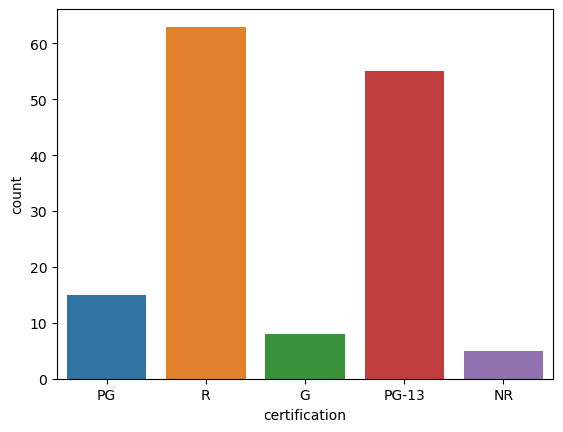

In [22]:
sns.countplot(data=df, x='certification');
df['certification'].value_counts(dropna=False)

### What is the average revenue per certification category?


certification
G       $ 105,343,104
NR       $ 20,248,255
PG       $ 92,079,170
PG-13   $ 113,135,307
R        $ 45,063,643
Name: revenue, dtype: float64

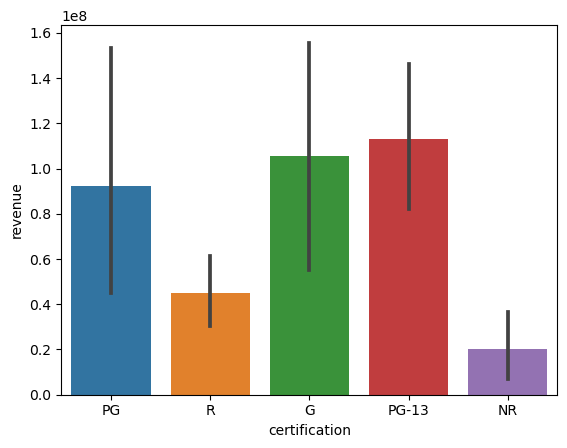

In [23]:
with pd.option_context('display.float_format',lambda x: f"$ {x:,.0f}"):
    display(df.groupby('certification')['revenue'].mean())

sns.barplot(data=df, x='certification', y='revenue');

### What is the average budget per certification category?


certification
G       $ 45,000,000
NR      $ 16,060,000
PG      $ 54,210,000
PG-13   $ 48,263,636
R       $ 22,287,778
Name: budget, dtype: float64

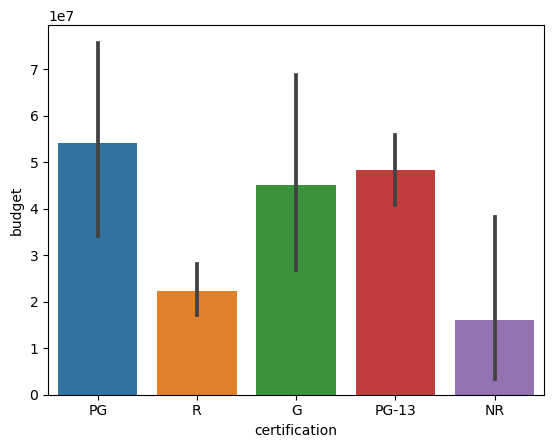

In [24]:
with pd.option_context('display.float_format',lambda x: f"$ {x:,.0f}"):
    display(df.groupby('certification')['budget'].mean())

sns.barplot(data=df, x='certification', y='budget');